# Lab1: Data Understanding

In [70]:
import pandas as pd
import numpy as np
import matplotlib as plt

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [4]:
#read in data
county_facts = pd.read_csv("./2012-and-2016-presidential-elections/county_facts.csv")
county_facts_dict = pd.read_csv("./2012-and-2016-presidential-elections/county_facts_dictionary.csv")
results = pd.read_csv("./2012-and-2016-presidential-elections/US_County_Level_Presidential_Results_12-16.csv")
votes = pd.read_csv("./2012-and-2016-presidential-elections/votes.csv")


### Exploratory Data Anlaysis

In [5]:
county_facts.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [8]:
county_facts_dict

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
6,AGE775214,"Persons 65 years and over, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
8,RHI125214,"White alone, percent, 2014"
9,RHI225214,"Black or African American alone, percent, 2014"


#### County Facts Statistics

In [8]:
county_facts.describe()

,fips,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
count,3195.000000,3.195000e+03,3.195000e+03,3195.000000,3.195000e+03,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,...,3195.000000,3195.000000,3.195000e+03,3.195000e+03,3.195000e+03,3195.000000,3.195000e+03,3.195000e+03,3.195000e+03,3195.000000
mean,30358.079499,2.993963e+05,2.899137e+05,0.508545,2.899019e+05,5.900782,22.545290,17.524632,49.913271,84.953271,...,1.735055,18.108169,4.732329e+06,3.804132e+06,3.677504e+06,10287.325196,5.739886e+05,9.823005e+02,3.316344e+03,261.265227
std,15181.225584,5.768468e+06,5.584181e+06,4.180066,5.583955e+06,1.211925,3.418896,4.433712,2.425066,16.290780,...,6.222794,12.809596,9.623516e+07,7.613666e+07,7.082882e+07,5409.442797,1.112830e+07,1.902455e+04,6.402903e+04,1718.802670
min,0.000000,0.000000e+00,0.000000e+00,-17.000000,8.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000e+00,0.000000
25%,18172.000000,1.113450e+04,1.129500e+04,-1.900000,1.129500e+04,5.200000,20.500000,14.700000,49.500000,80.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,7.818500e+04,6910.000000,6.240000e+03,6.000000e+00,4.325450e+02,17.150000
50%,29175.000000,2.655300e+04,2.644600e+04,-0.100000,2.642400e+04,5.800000,22.500000,17.200000,50.400000,91.900000,...,0.000000,23.400000,7.103000e+04,4.852600e+04,2.604220e+05,9806.000000,2.606300e+04,3.400000e+01,6.232800e+02,45.700000
75%,45076.000000,7.247600e+04,7.150450e+04,2.300000,7.144800e+04,6.500000,24.200000,19.800000,51.100000,95.900000,...,0.600000,27.800000,9.766630e+05,2.677625e+05,8.358655e+05,13002.500000,1.037800e+05,1.655000e+02,9.445850e+02,115.800000
max,56045.000000,3.188571e+08,3.087581e+08,72.900000,3.087455e+08,13.700000,42.000000,52.900000,56.800000,99.300000,...,78.000000,56.200000,5.319456e+09,4.174287e+09,3.917663e+09,80800.000000,6.137957e+08,1.046363e+06,3.531905e+06,69467.500000


In [9]:
county_facts['area_name'].nunique()

1929

In [11]:
county_facts['fips'].nunique()

3195

#### Votes 

In [7]:
votes.head()

,Unnamed: 0,X,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,Clinton,Trump,diff_2016,per_point_diff_2016,...,AFN120207,BPS030214,LND110210,Density,Clinton_Obama,Trump_Romney,Trump_Prediction,Clinton_Prediction,Trump_Deviation,Clinton_Deviation
0,30,29,1001,5908,18110,24661,0.239569,0.734358,12202,-0.494789,...,88157,131,594.44,91.8,-0.026189,0.008021,0.620859,0.340493,-0.113499,0.100924
1,31,30,1003,18409,72780,94090,0.195653,0.773515,54371,-0.577862,...,436955,1384,1589.78,114.6,-0.020013,-0.000383,0.586749,0.359502,-0.186766,0.163849
2,32,31,1005,4848,5431,10390,0.466603,0.522714,583,-0.056112,...,0,8,884.88,31.0,-0.045920,0.039339,0.517832,0.474693,-0.004882,0.008090
3,33,32,1007,1874,6733,8748,0.214220,0.769662,4859,-0.555441,...,10757,19,622.58,36.8,-0.047965,0.038998,0.692227,0.286031,-0.077434,0.071811
4,34,33,1009,2150,22808,25384,0.084699,0.898519,20658,-0.813820,...,20941,3,644.78,88.9,-0.038779,0.033590,0.789649,0.177490,-0.108870,0.092791


In [7]:
votes.columns

Index(['Unnamed: 0', 'X', 'combined_fips', 'votes_dem_2016', 'votes_gop_2016',
       'total_votes_2016', 'Clinton', 'Trump', 'diff_2016',
       'per_point_diff_2016', 'state_abbr', 'county_name', 'FIPS',
       'total_votes_2012', 'votes_dem_2012', 'votes_gop_2012', 'county_fips',
       'state_fips', 'Obama', 'Romney', 'diff_2012', 'per_point_diff_2012',
       'fips', 'area_name', 'state_abbreviation', 'population2014',
       'population2010', 'population_change', 'POP010210', 'AGE135214',
       'AGE295214', 'age65plus', 'SEX255214', 'White', 'Black', 'RHI325214',
       'RHI425214', 'RHI525214', 'RHI625214', 'Hispanic', 'RHI825214',
       'POP715213', 'POP645213', 'NonEnglish', 'Edu_highschool',
       'Edu_batchelors', 'VET605213', 'LFE305213', 'HSG010214', 'HSG445213',
       'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213', 'Income',
       'INC110213', 'Poverty', 'BZA010213', 'BZA110213', 'BZA115213',
       'NES010213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207',

#### Votes Statistics

In [21]:
votes.describe()

,Unnamed: 0,X,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,Clinton,Trump,diff_2016,per_point_diff_2016,...,AFN120207,BPS030214,LND110210,Density,Clinton_Obama,Trump_Romney,Trump_Prediction,Clinton_Prediction,Trump_Deviation,Clinton_Deviation
count,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.000000,3.112000e+03,3112.000000,3112.000000,3.112000e+03,3112.000000,...,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3.112000e+03
mean,1585.500000,1584.500000,30651.700514,2.001874e+04,19600.109576,4.167676e+04,0.317070,0.636152,1.162099e+04,-0.319082,...,1.942344e+05,335.566195,951.557584,261.540424,-0.067872,0.038320,0.636152,0.317070,-1.988644e-16,9.519574e-16
std,898.501345,898.501345,14984.654885,7.190185e+04,40362.196846,1.132173e+05,0.153578,0.156499,4.270328e+04,0.308811,...,8.889694e+05,1303.162468,1303.291942,1732.510014,0.049541,0.055818,0.119622,0.119516,1.009088e-01,9.644692e-02
min,30.000000,29.000000,1001.000000,4.000000e+00,57.000000,6.400000e+01,0.031447,0.041221,2.000000e+00,-0.916364,...,0.000000e+00,0.000000,2.000000,0.100000,-0.234450,-0.369501,-0.226873,0.047050,-3.490927e-01,-4.203195e-01
25%,807.750000,806.750000,19038.500000,1.166000e+03,3206.000000,4.820500e+03,0.204759,0.549478,1.599750e+03,-0.546899,...,6.093250e+03,5.000000,430.122500,17.675000,-0.102089,0.008961,0.574797,0.227744,-6.918939e-02,-6.246817e-02
50%,1585.500000,1584.500000,29208.000000,3.153000e+03,7164.500000,1.094700e+04,0.284739,0.667431,3.746000e+03,-0.382174,...,2.536600e+04,32.000000,611.010000,45.700000,-0.062950,0.038808,0.659328,0.288825,5.526219e-04,2.608661e-05
75%,2363.250000,2362.250000,46005.500000,9.599750e+03,17427.250000,2.879650e+04,0.399610,0.751471,8.510000e+03,-0.149008,...,9.408875e+04,149.000000,914.625000,115.100000,-0.033529,0.073050,0.723051,0.380064,6.616193e-02,6.805273e-02
max,3141.000000,3140.000000,56045.000000,1.893770e+06,620285.000000,2.652072e+06,0.928466,0.952727,1.273485e+06,0.887245,...,2.485784e+07,40060.000000,20056.940000,69467.500000,0.093457,0.233132,0.965341,1.212759,4.214340e-01,3.857468e-01


In [12]:
votes['area_name'].nunique()

1846

In [20]:
votes.isna().sum()

Unnamed: 0            0
X                     0
combined_fips         0
votes_dem_2016        0
votes_gop_2016        0
                     ..
Trump_Romney          0
Trump_Prediction      0
Clinton_Prediction    0
Trump_Deviation       0
Clinton_Deviation     0
Length: 82, dtype: int64

In [47]:
# Find common columns between county_facts and votes
common_cols = np.intersect1d(county_facts.columns, votes.columns).tolist()

print("county_facts and votes have {} columns in common", len(common_cols))
print(common_cols)

county_facts and votes have {} columns in common 41
['AFN120207', 'AGE135214', 'AGE295214', 'BPS030214', 'BZA010213', 'BZA110213', 'BZA115213', 'HSD310213', 'HSD410213', 'HSG010214', 'HSG096213', 'HSG445213', 'HSG495213', 'INC110213', 'LFE305213', 'LND110210', 'MAN450207', 'NES010213', 'POP010210', 'POP645213', 'POP715213', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI825214', 'RTN130207', 'RTN131207', 'SBO001207', 'SBO015207', 'SBO115207', 'SBO215207', 'SBO315207', 'SBO415207', 'SBO515207', 'SEX255214', 'VET605213', 'WTN220207', 'area_name', 'fips', 'state_abbreviation']


In [50]:
#remove area_name, fips, and state_abbreviation
common_cols = common_cols[:-3]
common_cols

['AFN120207',
 'AGE135214',
 'AGE295214',
 'BPS030214',
 'BZA010213',
 'BZA110213',
 'BZA115213',
 'HSD310213',
 'HSD410213',
 'HSG010214',
 'HSG096213',
 'HSG445213',
 'HSG495213',
 'INC110213',
 'LFE305213',
 'LND110210',
 'MAN450207',
 'NES010213',
 'POP010210',
 'POP645213',
 'POP715213',
 'RHI325214',
 'RHI425214',
 'RHI525214',
 'RHI625214',
 'RHI825214',
 'RTN130207',
 'RTN131207',
 'SBO001207',
 'SBO015207',
 'SBO115207',
 'SBO215207',
 'SBO315207',
 'SBO415207',
 'SBO515207',
 'SEX255214',
 'VET605213',
 'WTN220207']

In [58]:
votes_dict = county_facts_dict.loc[county_facts_dict.column_name.isin(common_cols)]
votes_dict

,column_name,description
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
10,RHI325214,"American Indian and Alaska Native alone, perce..."
11,RHI425214,"Asian alone, percent, 2014"
12,RHI525214,Native Hawaiian and Other Pacific Islander alo...
13,RHI625214,"Two or More Races, percent, 2014"
15,RHI825214,"White alone, not Hispanic or Latino, percent, ..."
16,POP715213,"Living in same house 1 year & over, percent, 2..."


In [59]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 82 columns):
Unnamed: 0             3112 non-null int64
X                      3112 non-null int64
combined_fips          3112 non-null int64
votes_dem_2016         3112 non-null int64
votes_gop_2016         3112 non-null int64
total_votes_2016       3112 non-null int64
Clinton                3112 non-null float64
Trump                  3112 non-null float64
diff_2016              3112 non-null int64
per_point_diff_2016    3112 non-null float64
state_abbr             3112 non-null object
county_name            3112 non-null object
FIPS                   3112 non-null int64
total_votes_2012       3112 non-null int64
votes_dem_2012         3112 non-null int64
votes_gop_2012         3112 non-null int64
county_fips            3112 non-null int64
state_fips             3112 non-null int64
Obama                  3112 non-null float64
Romney                 3112 non-null float64
diff_2012            

In [68]:
pd.options.display.width = 0

In [71]:
votes.describe()

,Unnamed: 0,X,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,Clinton,Trump,diff_2016,per_point_diff_2016,FIPS,total_votes_2012,votes_dem_2012,votes_gop_2012,county_fips,state_fips,Obama,Romney,diff_2012,per_point_diff_2012,fips,population2014,population2010,population_change,POP010210,AGE135214,AGE295214,age65plus,SEX255214,White,Black,RHI325214,RHI425214,RHI525214,RHI625214,Hispanic,RHI825214,POP715213,POP645213,NonEnglish,Edu_highschool,Edu_batchelors,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,Income,INC110213,Poverty,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,Density,Clinton_Obama,Trump_Romney,Trump_Prediction,Clinton_Prediction,Trump_Deviation,Clinton_Deviation
count,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.000000,3.112000e+03,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3.112000e+03,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3.112000e+03,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.00000,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3.112000e+03,3.112000e+03,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3.112000e+03
mean,1585.500000,1584.500000,30651.700514,2.001874e+04,19600.109576,4.167676e+04,0.317070,0.636152,1.162099e+04,-0.319082,30651.700514,3.950556e+04,1.999004e+04,18890.392352,30651.700514,30.548522,0.384943,0.597833,9565.503535,-0.212890,30651.700514,1.022237e+05,9.898707e+04,0.450193,9.898104e+04,5.886954,22.537596,17.640199,49.955752,0.854003,0.093004,1.974325,1.360508,0.102731,1.854659,0.090471,77.366195,86.428663,4.492738,9.139396,84.513753,19.742738,6809.810733,23.090167,4.294617e+04,72.27410,12.340778,130378.566838,3.706795e+04,2.524242,23564.862147,45780.743573,16.708869,2393.890103,3.691914e+04,0.685186,7375.390103,8.845656e+03,2.412275,0.458098,0.802024,0.016131,1.702506,17.985668,1.433394e+06,1.221736e+06,1.254781e+06,10247.349293,1.942344e+05,335.566195,951.557584,261.540424,-0.067872,0.038320,0.636152,0.317070,-1.988644e-16,9.519574e-16
std,898.501345,898.501345,14984.654885,7.190185e+04,40362.196846,1.132173e+05,0.153578,0.156499,4.270328e+04,0.308811,14984.654885,1.056297e+05,6.599190e+04,41731.449644,14984.654885,14.965305,0.148024,0.147614,36023.739788,0.295500,14984.654885,3.276072e+05,3.143304e+05,4.195582,3.143192e+05,1.183065,3.333600,4.387073,2.205303,0.157884,0.144830,6.546744,2.549237,0.407195,1.354658,0.135350,19.630268,4.393120,5.520896,11.400221,6.912147,8.830104,16340.264829,5.358362,1.254331e+05,7.87098,9.266995,77576.803226,1.116752e+05,0.242664,5540.857034,11802.109370,6.490003,8210.563386,1.360174e+05,5.908336,28316.281385,3.169620e+04,6.914713,2.861644,2.550786,0.350419,6.253284,12.842991,5.732086e+06,7.332659e+06,4.155059e+06,5424.049890,8.889694e+05,1303.162468,1303.291942,1732.510014,0.049541,0.055818,0.119622,0.119516,1.009088e-01,9.644692e-02
min,30.000000,29.000000,1001.000000,4.000000e+00,57.000000,6.400000e+01,0.031447,0.041221,2.000000e+00,-0.916364,1001.000000,6.400000e+01,5.000000e+00,54.000000,1001.000000,1.000000,0.034483,0.060064,1.000000,-0.924138,1001.000000,8.600000e+01,8.200000e+01,-17.000000,8.200000e+01,1.500000,7.400000,4.100000,30.100000,0.059000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,3.100000,50.800000,0.000000,0.000000,45.000000,3.200000,2.000000,8.200000,5.000000e+01,19.4

In [72]:
votes.head()

,Unnamed: 0,X,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,Clinton,Trump,diff_2016,per_point_diff_2016,state_abbr,county_name,FIPS,total_votes_2012,votes_dem_2012,votes_gop_2012,county_fips,state_fips,Obama,Romney,diff_2012,per_point_diff_2012,fips,area_name,state_abbreviation,population2014,population2010,population_change,POP010210,AGE135214,AGE295214,age65plus,SEX255214,White,Black,RHI325214,RHI425214,RHI525214,RHI625214,Hispanic,RHI825214,POP715213,POP645213,NonEnglish,Edu_highschool,Edu_batchelors,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,Income,INC110213,Poverty,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,Density,Clinton_Obama,Trump_Romney,Trump_Prediction,Clinton_Prediction,Trump_Deviation,Clinton_Deviation
0,30,29,1001,5908,18110,24661,0.239569,0.734358,12202,-0.494789,AL,Autauga County,1001,23909,6354,17366,1001,1,0.265758,0.726337,11012,-0.460580,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,0.779,0.187,0.5,1.1,0.1,1.8,0.027,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8,-0.026189,0.008021,0.620859,0.340493,-0.113499,0.100924
1,31,30,1003,18409,72780,94090,0.195653,0.773515,54371,-0.577862,AL,Baldwin County,1003,84988,18329,65772,1003,1,0.215666,0.773897,47443,-0.558232,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,0.871,0.096,0.7,0.9,0.1,1.6,0.046,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,-0.020013,-0.000383,0.586749,0.359502,-0.186766,0.163849
2,32,31,1005,4848,5431,10390,0.466603,0.522714,583,-0.056112,AL,Barbour County,1005,11459,5873,5539,1005,1,0.512523,0.483376,334,0.029147,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,0.502,0.476,0.6,0.5,0.2,0.9,0.045,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0,-0.045920,0.039339,0.517832,0.474693,-0.004882,0.008090
3,33,32,1007,1874,6733,8748,0.214220,0.769662,4859,-0.555441,AL,Bibb County,1007,8391,2200,6131,1007,1,0.262186,0.730664,3931,-0.468478,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,45.9,0.763,0.221,0.4,0.2,0.1,0.9,0.021,74.5,86.6,1.2,2.1,77.5,12.1,1327,27.6,8978,79.0,7.3,90500,7091,3.03,17427,36447,18.1,275,3145,7.5,1126,1385,14.9,0.0,0.0,0.0,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8,-0.047965,0.038998,0.692227,0.286031,-0.077434,0.071811
4,34,33,1009,2150,22808,25384,0.084699,0.898519,20658,-0.813820,AL,Blount County,1009,23980,2961,20741,1009,1,0.123478,0.864929,17780,-0.741451,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,50.5,0.960,0.018,0.6,0.3,0.1,1.2,0.087,87.8,88.7,4.3,7.3,77.0,12.1,4540,33.9,23826,81.0,4.5,117100,21108,2.70,20730,44145,15.8,660,6798,3.4,3563,4458,0.0,0.0,0.0,0.0,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9,-0.038779,0.033590,0.789649,0.177490,-0.108870,0.092791


##### Attribute Selection

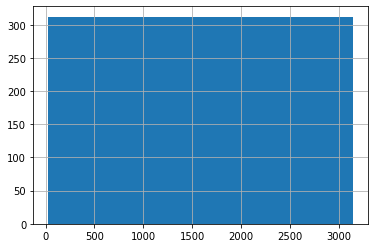

In [62]:
votes['X'].hist()

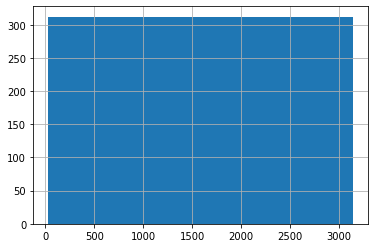

In [63]:
votes['Unnamed: 0'].hist()

In [118]:
# Unnamed: 0 and X don't show any relevance to the data. 
# Not to mention there is no existing documentation of what they mean

attributes = ['votes_dem_2016',
              'votes_gop_2016',
              'total_votes_2016',
              'Clinton',
              'Trump',
              'state_abbr',
              'total_votes_2012',
              'votes_dem_2012',
              'votes_gop_2012',
              'Obama','Romney',
              'area_name',
              'population2014',
              'SEX255214',
              'White',
              'Black',
              'RHI325214',
              'RHI425214',
              'RHI525214',
              'RHI625214',
              'Hispanic',
              'RHI825214',
              'Edu_highschool',
              'Edu_batchelors',
              'INC110213',
              'Poverty',
              'BZA010213',
              'BZA110213',
              'Trump_Prediction',
              'Clinton_Prediction']

votes = votes[attributes]

votes

,votes_dem_2016,votes_gop_2016,total_votes_2016,Clinton,Trump,state_abbr,total_votes_2012,votes_dem_2012,votes_gop_2012,Obama,Romney,area_name,population2014,SEX255214,White,Black,RHI325214,RHI425214,RHI525214,RHI625214,Hispanic,RHI825214,Edu_highschool,Edu_batchelors,INC110213,Poverty,BZA010213,BZA110213,Trump_Prediction,Clinton_Prediction
0,5908,18110,24661,0.239569,0.734358,AL,23909,6354,17366,0.265758,0.726337,Autauga County,55395,51.4,0.779,0.187,0.5,1.1,0.1,1.8,0.027,75.6,85.6,20.9,53682,12.1,817,10120,0.620859,0.340493
1,18409,72780,94090,0.195653,0.773515,AL,84988,18329,65772,0.215666,0.773897,Baldwin County,200111,51.2,0.871,0.096,0.7,0.9,0.1,1.6,0.046,83.0,89.1,27.7,50221,13.9,4871,54988,0.586749,0.359502
2,4848,5431,10390,0.466603,0.522714,AL,11459,5873,5539,0.512523,0.483376,Barbour County,26887,46.6,0.502,0.476,0.6,0.5,0.2,0.9,0.045,46.6,73.7,13.4,32911,26.7,464,6611,0.517832,0.474693
3,1874,6733,8748,0.214220,0.769662,AL,8391,2200,6131,0.262186,0.730664,Bibb County,22506,45.9,0.763,0.221,0.4,0.2,0.1,0.9,0.021,74.5,77.5,12.1,36447,18.1,275,3145,0.692227,0.286031
4,2150,22808,25384,0.084699,0.898519,AL,23980,2961,20741,0.123478,0.864929,Blount County,57719,50.5,0.960,0.018,0.6,0.3,0.1,1.2,0.087,87.8,77.0,12.1,44145,15.8,660,6798,0.789649,0.177490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3233,12153,16661,0.194046,0.729428,WY,16750,4773,11427,0.284955,0.682209,Sweetwater County,45010,48.1,0.943,0.015,1.3,0.9,0.2,1.8,0.158,79.7,91.0,18.1,71525,11.3,1347,17053,0.665093,0.272789
3108,7313,3920,12176,0.600608,0.321945,WY,11356,6211,4858,0.546936,0.427791,Teton County,22930,48.2,0.949,0.012,1.0,1.3,0.1,1.5,0.152,80.9,96.8,48.7,68078,8.2,1952,15357,0.425316,0.494972
3109,1202,6154,8053,0.149261,0.764187,WY,8453,1628,6613,0.192594,0.782326,Uinta County,20904,49.6,0.954,0.009,1.2,0.5,0.2,1.8,0.092,87.3,89.2,18.9,58515,13.3,595,7712,0.685461,0.256831
3110,532,2911,3715,0.143203,0.783580,WY,3911,794,3013,0.203017,0.770391,Washakie County,8322,49.3,0.948,0.008,1.7,0.7,0.1,1.8,0.139,82.7,90.5,23.6,47104,12.1,378,2986,0.632028,0.305111


In [119]:

attribute_dict = pd.DataFrame(data={'Attribute': attributes, 'Description': '', 'Scales': '', 'Discrete/Continuous':'','Range':''})
attribute_dict

,Attribute,Description,Scales,Discrete/Continuous,Range
0,votes_dem_2016,,,,
1,votes_gop_2016,,,,
2,total_votes_2016,,,,
3,Clinton,,,,
4,Trump,,,,
5,state_abbr,,,,
6,total_votes_2012,,,,
7,votes_dem_2012,,,,
8,votes_gop_2012,,,,
9,Obama,,,,


#### Attributes